In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
GNI88 = pd.read_csv("/Users/carla/Desktop/internships/rethinkmedia/GNI88_cleaned_data.csv")

/Users/carla/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (9,10,24) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
GNI88.head()

,artdate,Article ID,Headline,Quote ID,Article Status,Article Position,Messages,Submessages,Quote Position,Legacy Quote Tag,...,Constituent Group,Media Name,Media Medium,Journalist Name,Constituent Author,Article Issues,Custom Group,Media Group,fulltext,source_name_cleaned
0,2018-02-05,3774467,Opinion: They Voted for Caps. Now They Want Mo...,7096188,Opinion,Neutral,OLD Spending,OLD Nukes Budget Campaign,Neutral,NaN,...,None (Legacy Other),Roll Call,Print,"Bell, Steve",NaN,NaN,Commentary,Capitol Hill Media,Opinion: They Voted for Caps. Now They Want Mo...,Steve Bell
1,2018-02-23,3777413,Can James Mattis Prevent Nuclear War With Nort...,7105520,News,Neutral,OLD Proliferation,OLD State Level Nuclear Programs,Neutral,NaN,...,None (Legacy Other),News Week,NaN,"Fryer-biggs, Zachary",NaN,NaN,NaN,NaN,Can James Mattis Prevent Nuclear War With Nort...,James Mattis
2,2018-02-23,3777413,Can James Mattis Prevent Nuclear War With Nort...,7105517,News,Neutral,OLD Proliferation,OLD State Level Nuclear Programs,Neutral,NaN,...,None (Legacy Other),News Week,NaN,"Fryer-biggs, Zachary",NaN,NaN,NaN,NaN,Can James Mattis Prevent Nuclear War With Nort...,James Mattis
3,2018-02-23,3777413,Can James Mattis Prevent Nuclear War With Nort...,7105518,News,Neutral,OLD Proliferation,OLD State Level Nuclear Programs,Positive,NaN,...,NaN,News Week,NaN,"Fryer-biggs, Zachary",NaN,NaN,NaN,NaN,Can James Mattis Prevent Nuclear War With Nort...,Leon E. Panetta
4,2018-02-23,3777413,Can James Mattis Prevent Nuclear War With Nort...,7105527,News,Neutral,OLD Proliferation,OLD State Level Nuclear Programs,Neutral,NaN,...,NaN,News Week,NaN,"Fryer-biggs, Zachary",NaN,NaN,NaN,NaN,Can James Mattis Prevent Nuclear War With Nort...,Chuck Hagel


### Look at the "Postive" and "Negative" Articles and explore what their quotes are like

In [4]:
GNI88_positive = GNI88[GNI88['Article Position'] == 'Positive'].reset_index()

In [5]:
GNI88_positive.head()

,index,artdate,Article ID,Headline,Quote ID,Article Status,Article Position,Messages,Submessages,Quote Position,...,Constituent Group,Media Name,Media Medium,Journalist Name,Constituent Author,Article Issues,Custom Group,Media Group,fulltext,source_name_cleaned
0,24,2018-02-16,3777418,The Olympics won't solve the Korea crisis,7105528,Opinion,Positive,OLD Proliferation,OLD State Level Nuclear Programs,Positive,...,None (Legacy Other),Los Angeles Times,Print,"Klingner, Bruce",NaN,NaN,Op-Ed,NaN,The Olympics won't solve the Korea crisis\r\n\...,Bruce Klingner
1,25,2018-02-16,3777418,The Olympics won't solve the Korea crisis,7105523,Opinion,Positive,OLD Proliferation,OLD State Level Nuclear Programs,Negative,...,None (Legacy Other),Los Angeles Times,Print,"Klingner, Bruce",NaN,NaN,Op-Ed,NaN,The Olympics won't solve the Korea crisis\r\n\...,H.R. McMaster
2,26,2018-02-16,3777418,The Olympics won't solve the Korea crisis,7105531,Opinion,Positive,OLD Proliferation,OLD State Level Nuclear Programs,Positive,...,None (Legacy Other),Los Angeles Times,Print,"Klingner, Bruce",NaN,NaN,Op-Ed,NaN,The Olympics won't solve the Korea crisis\r\n\...,Bruce Klingner
3,27,2018-02-16,3777418,The Olympics won't solve the Korea crisis,7105533,Opinion,Positive,OLD Proliferation,OLD State Level Nuclear Programs,Positive,...,None (Legacy Other),Los Angeles Times,Print,"Klingner, Bruce",NaN,NaN,Op-Ed,NaN,The Olympics won't solve the Korea crisis\r\n\...,Bruce Klingner
4,28,2018-02-16,3777418,The Olympics won't solve the Korea crisis,7105526,Opinion,Positive,OLD Proliferation,OLD State Level Nuclear Programs,Negative,...,None (Legacy Other),Los Angeles Times,Print,"Klingner, Bruce",NaN,NaN,Op-Ed,NaN,The Olympics won't solve the Korea crisis\r\n\...,Donald Trump


In [6]:
GNI88_positive['QText'][0]

'Launching a preemptive military strike, without any indication that a North Korean attack is imminent, would be an even bigger mistake. We would be starting a war in order to prevent a war. As Otto von Bismarck observed: "Preventive war is like committing suicide out of fear of death."'

In [7]:
GNI88_positive['QText'][1]

'President Trump finds this "intolerable" and has directed the military to prepare a preventive war option'

In [8]:
GNI88_positive['QText'][2]

"Some proponents of preventive attack, including people within the Trump administration, argue that it could be carried off with no consequences because North Korea would realize that it couldn't prevail in an all-out war with the United States.This view. however, is predicated on an illogical assumption that the North's allegedly non-deterrable madman would somehow make a sane and rational assessment of the costs and benefits.\r\n\r\nIn fact, any U.S. military operation against North Korea would carry dangerous consequences."

In [9]:
GNI88_positive['fulltext'][0]

'The Olympics won\'t solve the Korea crisis\r\n\r\nIt was an inspiring sight: North and South Korean Olympic teams marching together behind a single unification flag. Could the opening ceremonies augur a new era of inter-Korean reconciliation?\r\n\r\nNot likely. Pyongyang still refuses to abandon its nuclear arsenal or start a dialogue with the United States. Meanwhile, Washington has announced that the "toughest and most aggressive" sanctions against the regime are forthcoming.\r\n\r\nWhen the Olympic flame leaves Pyeongchang, the nuclear crisis will return. And it will do so even if South Korean President Moon Jae-in tries to keep the spirit alive by accepting a rare invitation from Kim Jong Un to visit the North for a summit meeting.\r\n\r\nNorth Korea is close to being able to strike the American homeland with nuclear weapons. As national security advisor H.R. McMaster and Joseph Dunford, the current chairman of the Joint Chiefs, have made clear, President Trump finds this "intoler

In [10]:
GNI88_negative = GNI88[GNI88['Article Position'] == 'Negative'].reset_index()

In [11]:
GNI88_negative.head()

,index,artdate,Article ID,Headline,Quote ID,Article Status,Article Position,Messages,Submessages,Quote Position,...,Constituent Group,Media Name,Media Medium,Journalist Name,Constituent Author,Article Issues,Custom Group,Media Group,fulltext,source_name_cleaned
0,125,2018-02-09,3779487,Pence vows to defend U.S. from N. Korea with w...,7114538,News,Negative,OLD Proliferation,OLD State Level Nuclear Programs,Negative,...,None (Legacy Other),NBC,NaN,"Edelman, Adam",NaN,NaN,NaN,NaN,Pence vows to defend U.S. from N. Korea with w...,Mike Pence
1,167,2018-02-13,3781378,Pentagon asks for major budget increase amid t...,7122737,News,Negative,OLD Missile Defense,OLD Domestic Programs,Negative,...,None (Legacy Other),CNN,NaN,"Rizzo, Jennifer",NaN,NaN,NaN,NaN,Pentagon asks for major budget increase amid t...,Donald Trump
2,414,2018-02-01,3784475,Boeing wins $6.6 billion deal to support missi...,7134205,News,Negative,OLD Missile Defense,OLD Domestic Programs,Neutral,...,None (Legacy Other),Defense News,NaN,"Judson, Jen",NaN,NaN,HI Missile Scare,NaN,Boeing wins $6.6 billion deal to support missi...,Statement DOD
3,415,2018-02-01,3784475,Boeing wins $6.6 billion deal to support missi...,7134209,News,Negative,OLD Missile Defense,OLD Domestic Programs,Negative,...,None (Legacy Other),Defense News,NaN,"Judson, Jen",NaN,NaN,HI Missile Scare,NaN,Boeing wins $6.6 billion deal to support missi...,Statement DOD
4,425,2018-02-06,3784486,North Korea using its Berlin embassy to acquir...,7134237,News,Negative,OLD Missile Defense,OLD Deployment and Testing,Negative,...,None (Legacy Other),CNN,NaN,"Capelouto, Susanna",NaN,NaN,NaN,NaN,North Korea using its Berlin embassy to acquir...,Georg Maassen


In [12]:
GNI88_negative['QText'][0]

'Vice President Mike Pence, in an exclusive interview with NBC\'s "Nightly News," vowed that the U.S. would protect itself from North Korean nuclear threats by taking whatever "action is necessary to defend our homeland.'

In [13]:
GNI88_negative['QText'][1]

"If they stop, we'll stop, but they're not stopping. So if they're not going to stop, we're going to be so far ahead of everybody else in nuclear like you've never seen before"

In [14]:
GNI88_negative['QText'][2]

'Under the contract modification, the MDA "executes missile defeat and defense enhancements to complete the accelerated delivery of a new missile field with 20 additional silos and two additional silos in a previously constructed missiled field at Fort Greely, Alaska, and the procurement and deployment of 20 additional [GBIs]'

In [15]:
GNI88_negative['fulltext'][0]

'Pence vows to defend U.S. from N. Korea with whatever \'action is necessary\'\r\n\r\nVice President Mike Pence, in an exclusive interview with NBC\'s "Nightly News," vowed that the U.S. would protect itself from North Korean nuclear threats by taking whatever "action is necessary to defend our homeland."\r\n\r\nSpeaking with NBC\'s Lester Holt on the sidelines of the23rd Olympic Winter Games, in PyeongChang, South Korea, Pence, who isleading the U.S. delegationthere, made clear that the U.S. was not ruling out military options as tensions continued to roil the Korean Peninsula.\r\n\r\n"We\'re going to continue to put all the pressure to bear economically and diplomatically, while preserving all of our military options to see that that happens," Pence said in a segment that aired Friday morning on "Today."\r\n-Watch the full interview tonight on "NBC Nightly News With Lester Holt"\r\n\r\n"President Trump and, and our allies in the region have agreed to delay our, our military exercises

### Implement the sentiment analysis model

In [20]:
# pip install -q transformers
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis")
data = ["I love you", "I hate you"]
sentiment_pipeline(data)

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some layers from the model checkpoint at distilbert-base-uncased-finetuned-sst-2-english were not used when initializing TFDistilBertForSequenceClassification: ['dropout_19']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceCla

[{'label': 'POSITIVE', 'score': 0.9998656511306763},
 {'label': 'NEGATIVE', 'score': 0.9991129040718079}]

In [17]:
data = [GNI88_positive['QText'][0], GNI88_positive['QText'][1], GNI88_positive['QText'][2]]
sentiment_pipeline(data)

[{'label': 'NEGATIVE', 'score': 0.9993492960929871},
 {'label': 'NEGATIVE', 'score': 0.9938384890556335},
 {'label': 'NEGATIVE', 'score': 0.9969114661216736}]

In [18]:
data = [GNI88_negative['QText'][0], GNI88_negative['QText'][1], GNI88_negative['QText'][2]]
sentiment_pipeline(data)

[{'label': 'NEGATIVE', 'score': 0.8242616653442383},
 {'label': 'POSITIVE', 'score': 0.9965071082115173},
 {'label': 'POSITIVE', 'score': 0.82791668176651}]

### 1st approach: keep the orginial binary output

In [19]:
GNI88_sentiment1 = GNI88.sample(n = 4000)
GNI88_sentiment1['Quote Sentiment'] = GNI88_sentiment1["QText"].apply(sentiment_pipeline)

In [21]:
GNI88_sentiment1['Quote Sentiment Score'] = GNI88_sentiment1['Quote Sentiment'].apply(lambda x: x[0]['score'])
GNI88_sentiment1['Quote Sentiment'] = GNI88_sentiment1['Quote Sentiment'].apply(lambda x: x[0]['label'])

In [22]:
GNI88_sentiment1.head()

,artdate,Article ID,Headline,Quote ID,Article Status,Article Position,Messages,Submessages,Quote Position,Legacy Quote Tag,...,Media Medium,Journalist Name,Constituent Author,Article Issues,Custom Group,Media Group,fulltext,source_name_cleaned,Quote Sentiment,Quote Sentiment Score
44827,2017-08-30,5141974,NKorea leader urges more missile launches targ...,8876890,News,Negative,OLD Missile Defense,OLD Deployment and Testing,Negative,NaN,...,NaN,"Klug, Foster",NaN,NaN,NaN,NaN,All Rights Reserved\r\n\r\n ...,Shinzo Abe,POSITIVE,0.999342
151326,2013-04-04,5179798,SKorea: North Korea moved missile to east coast,9076505,News,Neutral,OLD Proliferation,OLD State Level Nuclear Programs,Neutral,NaN,...,NaN,"Kim, Sam",NaN,NaN,NaN,NaN,All Rights Reserved\r\n \r\n\r\n \r\n\r\n22 of...,Government North Korea,NEGATIVE,0.996196
160089,2013-09-28,5180922,"US, Iran leaders talk for first time since 1979",9000924,News,Positive,OLD Iran,OLD Negotiations,Positive,NaN,...,NaN,"Pickler, Nedra",NaN,NaN,NaN,NaN,All Rights Reserved\r\n \r\n\r\n \r\n\r\n23 of...,Barack Obama,POSITIVE,0.999729
305259,2019-02-25,6061923,"In his grandfather's footsteps, Kim Jong Un he...",9772895,News,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,"Arms Reduction, Proliferation",NaN,NaN,"HANOI, Feb 26 (Reuters) - When North Korean le...",Dummy Source Type 1,POSITIVE,0.961710
292164,2012-06-27,5214390,Political Headlines,9093118,News,Neutral,OLD Missile Defense,OLD Domestic Programs,Neutral,NaN,...,NaN,"No By-Line,",NaN,Missile Defense,NaN,NaN,News; International\r\nPolitical Headlines\r\n...,Bret Baier,POSITIVE,0.952574


In [23]:
Counter(GNI88_sentiment1['Quote Sentiment'].tolist())

Counter({'POSITIVE': 1360, 'NEGATIVE': 2640})

In [34]:
source_groups = {"Foreign Government": ['Foreign Gov/Mil Official'],
                "Experts": ['Nuke Organization','Non-Profit/NGO','Think Tanks',
                            'Nuke Organization - Other', 'Nuke Organization - Academic',
                            'International Orgs','Academic','Nuclear Scientist',"Analyst/Commentator",
                            'Attorney','Regulator'],
                "US Congress": ['US Rep. & Staff','US Senate & Staff', 'Partisans/Fmr. Politicians'],
                "US Federal Officials": ['Federal Official','State/Local Official',
                                        'Former Admin. Officials','Judicial Official'],
                "US Defense": ['Military','US Military','retired US Military','Defense Forces','Defense'],
                "Media": ["Media/Journalist","Blogger"],
                "Corporate Official": ['Corporate Official'],
                "Other": ['Other','Chairman','Terrorist/Extremist','Information minister',
                          'Religious/Clerical', 'Ambassador', 'Nuclear Official',
                          'Citizen','Public Polling','US Police','Deputy']}

In [35]:
# Helper function that inverts a dictionary. This will be useful for using speaker groups
# later on in model evaluation
def invert_dict(dictionary):
  """Inputs:
     - dictionary: dict, dictionary we wish to invert
     Outputs:
     - dict, where keys are the initial dictionary's values and values are the initial dictionary's keys"""
  # get a list of all items in all dictionary values
  speaker_types = list(np.concatenate(list(dictionary.values())).flat)
  # each speaker type will become its own key now, and the value will be the speaker group it's a part of
  inverted_dict = {}
  for speaker_type in speaker_types:
    # find the group the speaker_type belongs in
    speaker_group = [key for key, value in dictionary.items() if speaker_type in value][0]
    # update the inverted dictionary such that the key is the speaker type and the value is the speaker group
    inverted_dict[speaker_type] = speaker_group
  return inverted_dict

In [36]:
source_to_group = invert_dict(source_groups)

In [37]:
def assign_source_to_group(source_type):
  """Inputs:
     - source_type: str, source type from quote datafame
     Outputs:
     - str of the bigger speaker category to which source_type belongs"""
  if type(source_type) != str:
    return "Other"
  else:
    return source_to_group[source_type]

In [38]:
GNI88_sentiment1['Source Type'] = GNI88_sentiment1['Source Type'].apply(assign_source_to_group)

In [39]:
def re_schema_for_country(row):
    # India, Pakistan, Saudi Arabia (KSA), Turkey
    if type(row["Messages"]) == float:
        return ""
    
    if type(row["Messages"]) == str:
        if "India" in row["Messages"]:
            return "India"
        if "Pakistan" in row["Messages"]:
            return "Pakistan"
        if "KSA" in row["Messages"]:
            return "KSA"
        if "Turkey" in row["Messages"]:
            return "Turkey"
        
        if "US Nuclear and Missile Policy" in row["Messages"]:
            return "US Nuclear and Missile Policy"
        
        
        # Iran/Russia/Israel/China/North Korea
        country_list = ["Iran", "Russia", "Israel", "China", "North Korea"]
        for country in country_list:
            if country in row["Messages"]:
                return country
            if row["Submessages"] and country in row["Submessages"]:
                return country
    
    
    if type(row["Submessages"]) == str:
        # treaties
        if (row["Submessages"] == "JCPOA" or row["Submessages"] == "START" 
            or row["Submessages"] == "INF" or row["Submessages"] == "NPT" 
            or row["Submessages"] == "CTBT" 
            or row["Submessages"] == "Tactical Nukes Treaty"
            or row["Submessages"] == "TPNW 2017"):
            return "Treaties"


        # other collapsing  
        if row["Submessages"] == "Worldwide Nukes Policy" :
            return "Arms Reduction"
        if row["Submessages"] == "NATO Arsenal" or  row["Submessages"] == "US/NATO Missile Defense":
            return "US Nuclear and Missile Policy"
        if ((row["Submessages"] == "NNSA Budget" or row["Submessages"] == "Spending and Modernization") 
            or "US Nuclear and Missile Policy" in row["Submessages"]):
            return "US Nuclear and Missile Policy"
        if (row["Submessages"] == "Loose Fissile Materials" or row["Submessages"] == "Health Issues" 
            or row["Submessages"] == "Actinides" or row["Submessages"] == "Nuclear Consequences"
            or "Fissile Material" in row["Submessages"]):
            return "Nuclear consequences"
        if row["Submessages"] == "Terrorist Threat":
            return "Nuclear consequences"
        if row["Submessages"] == "Nuclear Survivors":
            return "Nuclear consequences"
        
    return "Other"

In [40]:
GNI88_sentiment1["New Message"] = GNI88_sentiment1.apply(re_schema_for_country, axis = 1)

In [41]:
GNI88_sentiment1_positive = GNI88_sentiment1[GNI88_sentiment1['Quote Sentiment'] == 'POSITIVE']
GNI88_sentiment1_negative = GNI88_sentiment1[GNI88_sentiment1['Quote Sentiment'] == 'NEGATIVE']

<AxesSubplot:xlabel='Article Position', ylabel='Count'>

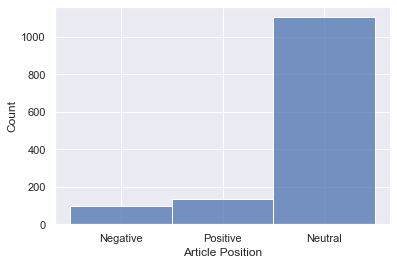

In [42]:
## correlation with article position?
sns.set(style="darkgrid")
sns.set(font_scale=1)
sns.histplot(data=GNI88_sentiment1_positive, x='Article Position', discrete=True) 

<AxesSubplot:xlabel='Article Position', ylabel='Count'>

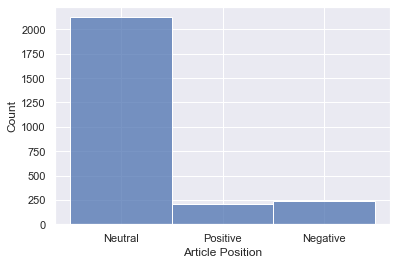

In [44]:
sns.histplot(data=GNI88_sentiment1_negative, x='Article Position', discrete=True) 

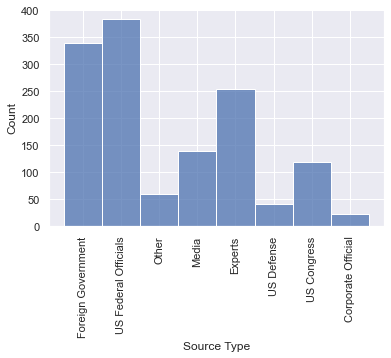

In [45]:
## correlation with speaker type?
plot = sns.histplot(data=GNI88_sentiment1_positive, x='Source Type', discrete=True)
plt.setp(plot.get_xticklabels(), rotation=90)[1]

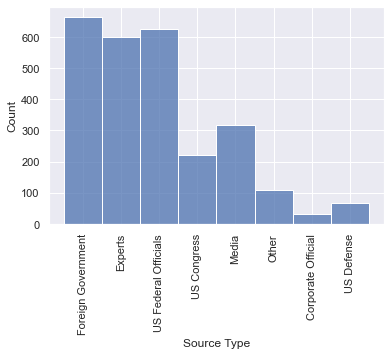

In [46]:
plot = sns.histplot(data=GNI88_sentiment1_negative, x='Source Type', discrete=True)
plt.setp(plot.get_xticklabels(), rotation=90)[1]

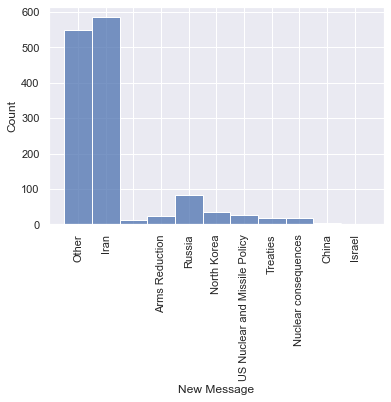

In [47]:
plot = sns.histplot(data=GNI88_sentiment1_positive, x='New Message', discrete=True)
plt.setp(plot.get_xticklabels(), rotation=90)[1]

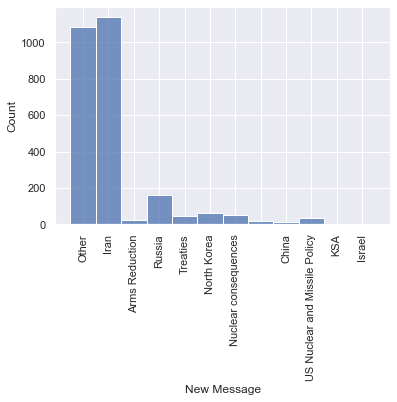

In [48]:
plot = sns.histplot(data=GNI88_sentiment1_negative, x='New Message', discrete=True)
plt.setp(plot.get_xticklabels(), rotation=90)[1]

### 2rd approach: label which scores are below 99 as "Neutral"

In [49]:
GNI88_sentiment2 = GNI88_sentiment1.copy().reset_index()
for i in range(4000):
    if GNI88_sentiment2['Quote Sentiment Score'][i] < 0.99:
        GNI88_sentiment2['Quote Sentiment'][i] = 'NEUTRAL'

/var/folders/tc/bh92rdln5b97ks_khyc1_kbh0000gn/T/ipykernel_63270/1217765795.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GNI88_sentiment2['Quote Sentiment'][i] = 'NEUTRAL'


In [50]:
GNI88_sentiment2.head()

,index,artdate,Article ID,Headline,Quote ID,Article Status,Article Position,Messages,Submessages,Quote Position,...,Journalist Name,Constituent Author,Article Issues,Custom Group,Media Group,fulltext,source_name_cleaned,Quote Sentiment,Quote Sentiment Score,New Message
0,44827,2017-08-30,5141974,NKorea leader urges more missile launches targ...,8876890,News,Negative,OLD Missile Defense,OLD Deployment and Testing,Negative,...,"Klug, Foster",NaN,NaN,NaN,NaN,All Rights Reserved\r\n\r\n ...,Shinzo Abe,POSITIVE,0.999342,Other
1,151326,2013-04-04,5179798,SKorea: North Korea moved missile to east coast,9076505,News,Neutral,OLD Proliferation,OLD State Level Nuclear Programs,Neutral,...,"Kim, Sam",NaN,NaN,NaN,NaN,All Rights Reserved\r\n \r\n\r\n \r\n\r\n22 of...,Government North Korea,NEGATIVE,0.996196,Other
2,160089,2013-09-28,5180922,"US, Iran leaders talk for first time since 1979",9000924,News,Positive,OLD Iran,OLD Negotiations,Positive,...,"Pickler, Nedra",NaN,NaN,NaN,NaN,All Rights Reserved\r\n \r\n\r\n \r\n\r\n23 of...,Barack Obama,POSITIVE,0.999729,Iran
3,305259,2019-02-25,6061923,"In his grandfather's footsteps, Kim Jong Un he...",9772895,News,NaN,NaN,NaN,NaN,...,NaN,NaN,"Arms Reduction, Proliferation",NaN,NaN,"HANOI, Feb 26 (Reuters) - When North Korean le...",Dummy Source Type 1,NEUTRAL,0.961710,
4,292164,2012-06-27,5214390,Political Headlines,9093118,News,Neutral,OLD Missile Defense,OLD Domestic Programs,Neutral,...,"No By-Line,",NaN,Missile Defense,NaN,NaN,News; International\r\nPolitical Headlines\r\n...,Bret Baier,NEUTRAL,0.952574,Other


In [53]:
Counter(GNI88_sentiment2['Quote Sentiment'].tolist())

Counter({'POSITIVE': 669, 'NEGATIVE': 1486, 'NEUTRAL': 1845})

In [54]:
GNI88_sentiment2_positive = GNI88_sentiment2[GNI88_sentiment2['Quote Sentiment'] == 'POSITIVE']
GNI88_sentiment2_negative = GNI88_sentiment2[GNI88_sentiment2['Quote Sentiment'] == 'NEGATIVE']
GNI88_sentiment2_neutral = GNI88_sentiment2[GNI88_sentiment2['Quote Sentiment'] == 'NEUTRAL']

<AxesSubplot:xlabel='Article Position', ylabel='Count'>

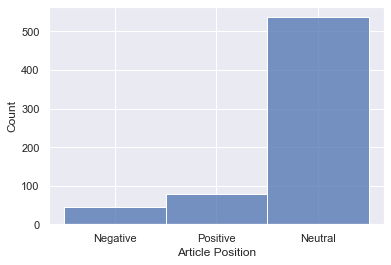

In [55]:
## correlation with article position?
sns.histplot(data=GNI88_sentiment2_positive, x='Article Position', discrete=True) 

<AxesSubplot:xlabel='Article Position', ylabel='Count'>

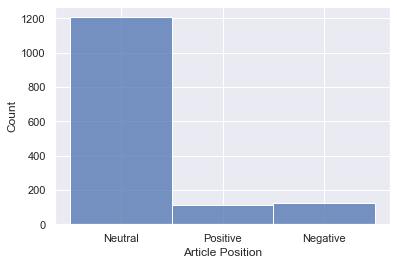

In [56]:
sns.histplot(data=GNI88_sentiment2_negative, x='Article Position', discrete=True) 

<AxesSubplot:xlabel='Article Position', ylabel='Count'>

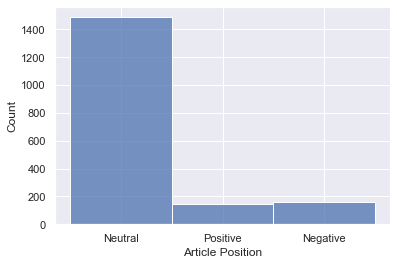

In [57]:
sns.histplot(data=GNI88_sentiment2_neutral, x='Article Position', discrete=True) 

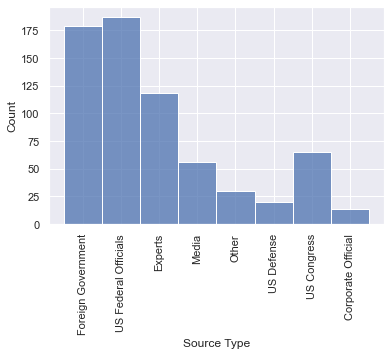

In [58]:
## correlation with speaker type?
plot = sns.histplot(data=GNI88_sentiment2_positive, x='Source Type', discrete=True)
plt.setp(plot.get_xticklabels(), rotation=90)[1]

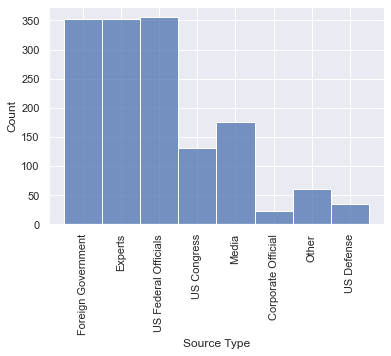

In [60]:
plot = sns.histplot(data=GNI88_sentiment2_negative, x='Source Type', discrete=True)
plt.setp(plot.get_xticklabels(), rotation=90)[1]

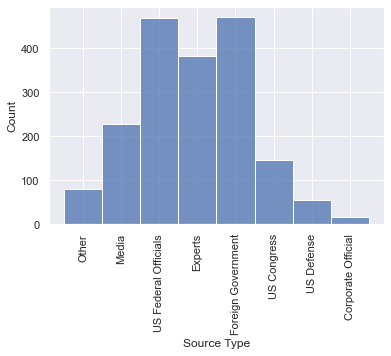

In [61]:
plot = sns.histplot(data=GNI88_sentiment2_neutral, x='Source Type', discrete=True)
plt.setp(plot.get_xticklabels(), rotation=90)[1]

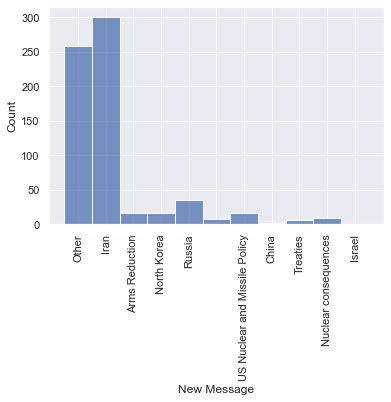

In [62]:
## correlation with new message?
plot = sns.histplot(data=GNI88_sentiment2_positive, x='New Message', discrete=True)
plt.setp(plot.get_xticklabels(), rotation=90)[1]

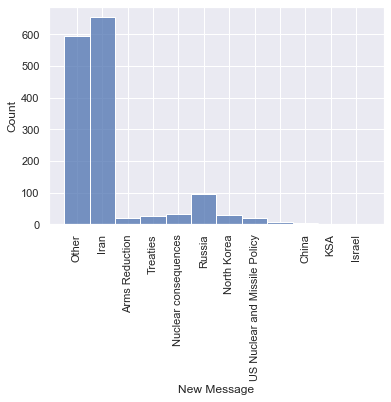

In [63]:
plot = sns.histplot(data=GNI88_sentiment2_negative, x='New Message', discrete=True)
plt.setp(plot.get_xticklabels(), rotation=90)[1]

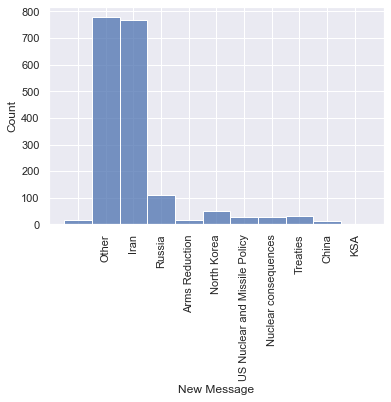

In [64]:
plot = sns.histplot(data=GNI88_sentiment2_neutral, x='New Message', discrete=True)
plt.setp(plot.get_xticklabels(), rotation=90)[1]

### Take Away:
### 1.the sentiment doesn't seem to have strong correlation with article position, speaker type or new message
### 2. Experts tend to be negative?
### 3. Possible reasons for the failure: 
####     1) model itself is not good
####     2) the model is fine, but the sentiment of a quote in news article is a hard-to-define question
####     3) the sentiment of a quote doesn't necessarily correlate with speaker type or the quote's topic